In [1]:
# Install necessary libraries
!pip install tensorflow opencv-python mediapipe matplotlib scikit-learn
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [2]:
# Initialize Mediapipe Holistic model and Drawing utilities
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities
def mediapipe_detection(image, model):
    # Convert the BGR image to RGB for the model processing
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False  # Mark the image as non-writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Make the image writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert the RGB image back to BGR
    return image, results

def draw_landmarks(image, results):
    # Draw landmarks for face, pose, left hand, and right hand using Mediapipe
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

def draw_styled_landmarks(image, results):
    # Draw landmarks with custom styling for face
    mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    )
    # Draw landmarks with custom styling for pose
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
    )
    # Draw landmarks with custom styling for left hand
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )
    # Draw landmarks with custom styling for right hand
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )


In [3]:
import mediapipe as mp

# Initialize the holistic model and drawing utilities
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

# Use the face mesh connections from the face mesh module
mp_face_mesh = mp.solutions.face_mesh

def draw_styled_landmarks(image, results):
    # Draw landmarks with custom styling for face
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    # Draw landmarks with custom styling for pose
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    # Draw landmarks with custom styling for left hand
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    # Draw landmarks with custom styling for right hand
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

# Initialize the video capture from the webcam
cap = cv2.VideoCapture(0)

# Set Mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Print the results for debugging
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


c:\Users\Fardin Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

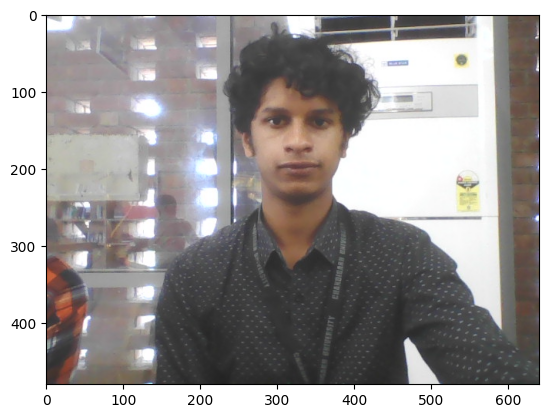

In [4]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [5]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [6]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [8]:
# Assuming 'results' is available from the previous detection loop
result_test = extract_keypoints(results)
print(result_test)

# Save and load the keypoints for further use
np.save('0', result_test)
loaded_result = np.load('0.npy')
print(loaded_result)


[ 0.50617158  0.35086361 -0.84516126 ...  0.          0.
  0.        ]
[ 0.50617158  0.35086361 -0.84516126 ...  0.          0.
  0.        ]


In [9]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Set up MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['Namaste', 'Hi How are you', 'Good_Morning'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

# Function to capture and save keypoints
def capture_and_save_keypoints():
    cap = cv2.VideoCapture(0)  # Start video capture

    # Set up Holistic model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        
        # Loop through actions
        for action in actions:
            # Create directory if it doesn't exist
            action_path = os.path.join(DATA_PATH, action)
            if not os.path.exists(action_path):
                os.makedirs(action_path)
            
            # Loop through sequences aka videos
            for sequence in range(start_folder, start_folder + no_sequences):
                # Create a directory for each sequence
                sequence_path = os.path.join(action_path, str(sequence))
                if not os.path.exists(sequence_path):
                    os.makedirs(sequence_path)

                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):
                    # Read frame
                    ret, frame = cap.read()
                    
                    if not ret:
                        break
                    
                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
                    
                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                    
                    # Display collection status
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)  # Wait for half a second
                    else:
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                    
                    # Extract and save keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(sequence_path, f"{frame_num}.npy")
                    np.save(npy_path, keypoints)

                    # Break gracefully if 'q' is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                
    cap.release()
    cv2.destroyAllWindows()

# Function to perform MediaPipe detection
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image.flags.writeable = False  # Improve performance
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Allow drawing
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results

# Function to draw landmarks
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    )
    # Draw pose landmarks
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
    )
    # Draw hand landmarks
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

# Function to extract keypoints from results
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Run the keypoint collection process
capture_and_save_keypoints()


In [10]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['Namaste', 'Hi How are you', 'Good_Morning'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0
# Create a label map
label_map = {label: num for num, label in enumerate(actions)}
print(label_map)

# Initialize sequences and labels
sequences, labels = [], []

# Loop through each action
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    for sequence in np.array(os.listdir(action_path)).astype(int):
        window = []
        for frame_num in range(sequence_length):
            npy_path = os.path.join(action_path, str(sequence), f"{frame_num}.npy")
            res = np.load(npy_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

# Convert to NumPy arrays
X = np.array(sequences)
y = to_categorical(labels).astype(int)

# Display shapes for debugging
print("Feature shape (X):", X.shape)
print("Labels shape (y):", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


{'Namaste': 0, 'Hi How are you': 1, 'Good_Morning': 2}
Feature shape (X): (90, 30, 1662)
Labels shape (y): (90, 3)
Training labels shape: (85, 3)
Testing labels shape: (5, 3)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

# Set up TensorBoard callback for visualizing training
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Build the Sequential LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length, X.shape[2])))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Add Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

# Print model summary
model.summary()


c:\Users\Fardin Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.2408 - loss: 1.4018
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3639 - loss: 2.5997
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.1703 - loss: 1.1323
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3542 - loss: 1.5873
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3053 - loss: 1.7363
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.2955 - loss: 1.2544
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3170 - loss: 1.1161
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3854 - loss: 1.1050
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.4070 - loss: 1.0282
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.6556 - loss: 0.9932
Epoch 11/1000
3/3 ━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [12]:
# 8. Make Predictions
res = model.predict(X_test)  # Predict on test data
print(actions[np.argmax(res[4])])  # Predicted action for the 5th sample
print(actions[np.argmax(y_test[4])])  # Actual action for the 5th sample


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Namaste
Namaste


In [13]:
# 9. Save Weights
model.save('action.h5')  # Save the trained model
del model  # Delete the model from memory

# Reload the model structure and weights
from tensorflow.keras.models import load_model
model = load_model('action.h5')  # Load the saved model


In [14]:
# 10. Evaluation using Confusion Matrix and Accuracy
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)  # Predict on test data
ytrue = np.argmax(y_test, axis=1).tolist()  # True labels
yhat = np.argmax(yhat, axis=1).tolist()  # Predicted labels

# Print Confusion Matrix and Accuracy Score
print(multilabel_confusion_matrix(ytrue, yhat))
print("Accuracy Score: ", accuracy_score(ytrue, yhat))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
[[[3 0]
  [0 2]]

 [[3 0]
  [0 2]]

 [[4 0]
  [0 1]]]
Accuracy Score:  1.0


In [18]:
from scipy import stats

# Define colors for visualization
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

# Function to visualize prediction probabilities
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Initialize variables for real-time prediction
sequence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)  # Start video capture

# Set MediaPipe Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        if not ret:
            break
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])  # Print the action prediction
            predictions.append(np.argmax(res))
            
            # Visualization logic
            if np.unique(predictions[-10:])[0] == np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    # Display only the most recent sign prediction
                    sentence = [actions[np.argmax(res)]]
            
            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
        
        # Display detected action
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Good_Morning
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Hi How are you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Hi How are you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Hi How are you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Hi How are you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Namaste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Namaste
1